<a href="https://colab.research.google.com/github/deboragoncalves/imersao-dados-alura/blob/main/desafios/desafios_aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Desafio 01: Inscritos onde o estado da residência é diferente do estado da prova

import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)

dados = pd.DataFrame({'numero_inscricao': data["NU_INSCRICAO"], 'uf_residencia': data["SG_UF_RESIDENCIA"], 'uf_prova': data["SG_UF_PROVA"]})

dados.query('uf_residencia != uf_prova')


,inscritos,uf_residencia,uf_prova
528,190001024195,MT,RO
572,190001026441,AC,RO
675,190001030292,PA,PR
825,190001036308,PA,PI
1275,190001053676,MA,PA
...,...,...,...
127193,190006109589,PB,PE
127244,190006112641,PB,PE
127316,190006117109,RN,PB
127348,190006118469,PA,CE


In [ ]:
# Desafio 02: Inscritos onde o munícipio em que residem é diferente de onde fizeram a prova

import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)

dados = pd.DataFrame({'numero_inscricao': data["NU_INSCRICAO"], 'municipio_residencia': data["NO_MUNICIPIO_RESIDENCIA"], 'municipio_prova': data["NO_MUNICIPIO_PROVA"]})

dados.query('municipio_residencia != municipio_prova')


,numero_inscricao,municipio_residencia,municipio_prova
36,190001005975,Sapucaia,Xinguara
37,190001006000,Santa Luzia do Pará,Capanema
38,190001006086,Ulianópolis,Dom Eliseu
45,190001006449,Santa Bárbara do Pará,Belém
48,190001006559,Maracanã,Igarapé-Açu
...,...,...,...
127348,190006118469,Belém,Fortaleza
127352,190006118561,Altinho,Agrestina
127354,190006118692,Licínio de Almeida,Caculé
127371,190006119825,Fagundes,Queimadas


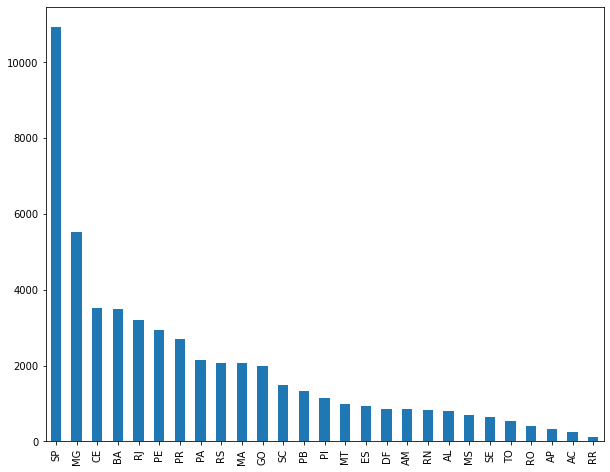

In [ ]:
# Desafio 03: Comparar a proporção de estados dos inscritos de até 18 anos

import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)

data.query("NU_IDADE <= 18")["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(10,8))


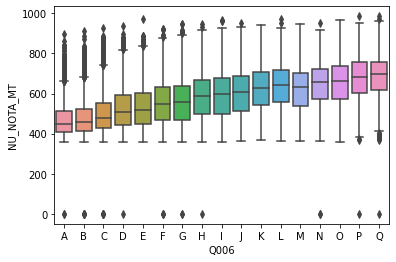

In [157]:
# Desafio 04: Criar função onde se modifica o eixo y e se exibe o gráfico, com o eixo x representando a renda

import pandas as pd
import seaborn as sns

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)

# Ordenar dados da coluna Q006. Unique = mostrar dados.

def criar_grafico(eixo_y):
  renda_ordenada = data["Q006"].unique()
  renda_ordenada.sort()

  return sns.boxplot(x=data["Q006"], y=eixo_y, data=dados, order=renda_ordenada)

criar_grafico(data["NU_NOTA_MT"])

In [ ]:
# Desafio 5: Verificar se quem zerou foi eliminado ou estava ausente

import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)

# Criar coluna com a soma das notas (linhas. axis=1)

provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

data["NU_NOTA_TOTAL"] = data[provas].sum(axis=1)

# Adicionar coluna no array e exibir notas 0

provas.append("NU_NOTA_TOTAL")

# Presentes/ausentes

lista_presentes = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT"]

dados = pd.DataFrame({'numero_inscricao': data["NU_INSCRICAO"], 'notas': data["NU_NOTA_TOTAL"], 'presenca_cn': data["TP_PRESENCA_CN"], 'presenca_ch': data["TP_PRESENCA_CH"], 'presenca_lc': data["TP_PRESENCA_LC"], 'presenca_mt': data["TP_PRESENCA_MT"]})

nota_0_ausentes = dados.query('notas == 0 and (presenca_cn != 1 or presenca_ch != 1 or presenca_lc != 1 or presenca_mt != 1)')

print(nota_0_ausentes)

nota_0_presentes = dados.query('notas == 0 and (presenca_cn == 1 and presenca_ch == 1 and presenca_lc == 1 and presenca_mt == 1)')

print(nota_0_presentes)

        numero_inscricao  notas_0  ...  presenca_lc  presenca_mt
10          190001005028      0.0  ...            0            0
11          190001005057      0.0  ...            0            0
26          190001005484      0.0  ...            0            0
38          190001006086      0.0  ...            0            0
40          190001006292      0.0  ...            0            0
...                  ...      ...  ...          ...          ...
127351      190006118552      0.0  ...            0            0
127365      190006119756      0.0  ...            0            0
127366      190006119783      0.0  ...            0            0
127368      190006119802      0.0  ...            0            0
127374      190006119995      0.0  ...            0            0

[29160 rows x 6 columns]
        numero_inscricao  notas_0  ...  presenca_lc  presenca_mt
8693        190001346616      0.0  ...            1            1
101269      190005050041      0.0  ...            1            1

In [ ]:
# Desafio 6: Verificar se quem foi eliminado tem nota 0 ou NaN

import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)

provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

data["NU_NOTA_TOTAL"] = data[provas].sum(axis=1)

provas.append("NU_NOTA_TOTAL")

dados = pd.DataFrame({'numero_inscricao': data["NU_INSCRICAO"], 'notas': data["NU_NOTA_TOTAL"]})

# Notas - NaN: vazio

notas_nulas = dados.query('notas.isnull().values')

print(notas_nulas)

# Notas 0

notas_0 = dados.query('notas == 0')

print(notas_0)

Empty DataFrame
Columns: [numero_inscricao, notas]
Index: []
        numero_inscricao  notas
10          190001005028    0.0
11          190001005057    0.0
26          190001005484    0.0
38          190001006086    0.0
40          190001006292    0.0
...                  ...    ...
127351      190006118552    0.0
127365      190006119756    0.0
127366      190006119783    0.0
127368      190006119802    0.0
127374      190006119995    0.0

[29162 rows x 2 columns]


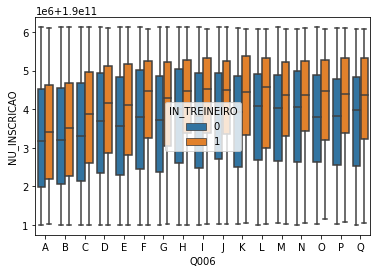

In [170]:
# Desafio 7: Verificar a proporção dos participantes de rendas mais altas e mais baixas entre os treineiros e não treineiros. 

import pandas as pd
import seaborn as sns

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)

def criar_grafico(eixo_y):
  renda_ordenada = data["Q006"].unique()
  renda_ordenada.sort()

  return sns.boxplot(x=data["Q006"], y=eixo_y, hue=data["IN_TREINEIRO"], data=dados, order=renda_ordenada)

criar_grafico(data["NU_INSCRICAO"])

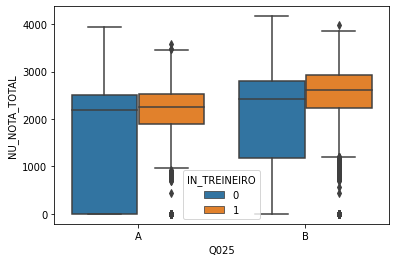

In [172]:
# Desafio 8: Verificar se as pessoas que tem acesso à internet tem notas mais altas

import pandas as pd
import seaborn as sns

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)

provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

data["NU_NOTA_TOTAL"] = data[provas].sum(axis=1)

provas.append("NU_NOTA_TOTAL")

def criar_grafico(eixo_y):
  renda_ordenada = data["Q025"].unique()
  renda_ordenada.sort()

  return sns.boxplot(x=data["Q025"], y=eixo_y, hue=data["IN_TREINEIRO"], data=dados, order=renda_ordenada)

criar_grafico(data["NU_NOTA_TOTAL"])